## FASE 1 – Cargar y entender el dataset
- Elegimos uno de los archivos (140_features_all_examples.txt)

- Lo cargamos con pandas.

- Separamos los features de las etiquetas (emociones).

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ignorar los warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning, module='tensorflow')
warnings.filterwarnings("ignore", category=DeprecationWarning, module='keras')

# Ruta del archivo 
archivo = '140_features_all_samples.txt'

# Cargar el dataset
df = pd.read_csv(archivo, header=None)

# Separar características y etiquetas
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## FASE 2 – Preprocesamiento
- Codificamos las etiquetas (de 0 a 6 para cada emoción).

- Normalizamos los datos.

- Dividimos en conjuntos de entrenamiento y prueba.

- Visualización de la distribución y preprocesado


Distribución de clases con nombres (orden según diccionario):
Felicidad    258
Asco         128
Ira          318
Miedo        262
Neutral      481
Sorpresa     298
Tristeza     275
Name: count, dtype: int64


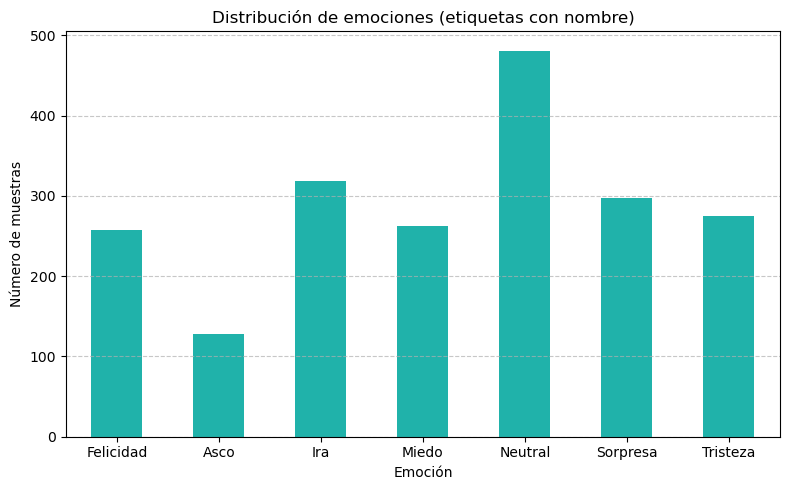


Datos preprocesados:
Conjunto de entrenamiento: 1616 muestras
Conjunto de prueba: 404 muestras

Distribución en y_train:
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([207, 102, 254, 210, 385, 238, 220], dtype=int64))

Distribución en y_test:
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([51, 26, 64, 52, 96, 60, 55], dtype=int64))


In [2]:
# En eldataset, las emociones están representadas por valores del 1 al 7.
# Sin embargo... internamente los modelos clasifican por índices de clase
# que empiezan en 0 (es decir, 0 a 6 si hay 7 clases).
y = y-1

# Diccionario de etiquetas con nombres
# En la Tabla 6 del artículo (página 13104), se muestra cómo están ordenadas las emociones. 
# Este es el orden de las columnas, que coincide con las etiquetas numéricas en el dataset:
diccionario_emociones = {
    0: 'Felicidad',
    1: 'Asco',
    2: 'Ira',
    3: 'Miedo',
    4: 'Neutral',
    5: 'Sorpresa',
    6: 'Tristeza'    
}

# Convertir etiquetas numéricas a nombres para análisis visual
y_nombres = pd.Series(y).map(diccionario_emociones)

# Ordenar según el orden definido en el diccionario
orden = list(diccionario_emociones.values())
conteo = y_nombres.value_counts()
conteo = conteo.reindex(orden)

print("\nDistribución de clases con nombres (orden según diccionario):")
print(conteo)

# Visualización de la distribución
plt.figure(figsize=(8, 5))
conteo.plot(kind='bar', color='lightseagreen')
plt.title('Distribución de emociones (etiquetas con nombre)')
plt.xlabel('Emoción')
plt.ylabel('Número de muestras')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizar los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Normalizar los datos de prueba utilizando el scaler ajustado con el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)

print("\nDatos preprocesados:")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# Verifica las etiquetas en entrenamiento y prueba
print("\nDistribución en y_train:")
print(np.unique(y_train, return_counts=True))

print("\nDistribución en y_test:")
print(np.unique(y_test, return_counts=True))


## FASE 3 – Crear y entrenar el modelo
- Usamos Keras + TensorFlow.

- Modelado.

- Plan de mejora

- Entrenamos y evaluamos con accuracy, precision, recall...

Predicciones únicas en y_pred:
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([ 30,  11,  69,  53, 148,  62,  31], dtype=int64))

Distribución de clases con nombres (orden según diccionario):
Felicidad     30
Asco          11
Ira           69
Miedo         53
Neutral      148
Sorpresa      62
Tristeza      31
Name: count, dtype: int64

Evaluación del modelo Random Forest:
Accuracy: 0.54

Reporte de clasificación:
              precision    recall  f1-score   support

   Felicidad       0.27      0.16      0.20        51
        Asco       0.73      0.31      0.43        26
         Ira       0.57      0.61      0.59        64
       Miedo       0.64      0.65      0.65        52
     Neutral       0.56      0.86      0.68        96
    Sorpresa       0.40      0.42      0.41        60
    Tristeza       0.65      0.36      0.47        55

    accuracy                           0.54       404
   macro avg       0.54      0.48      0.49       404
weighted avg       0.53      0.54     

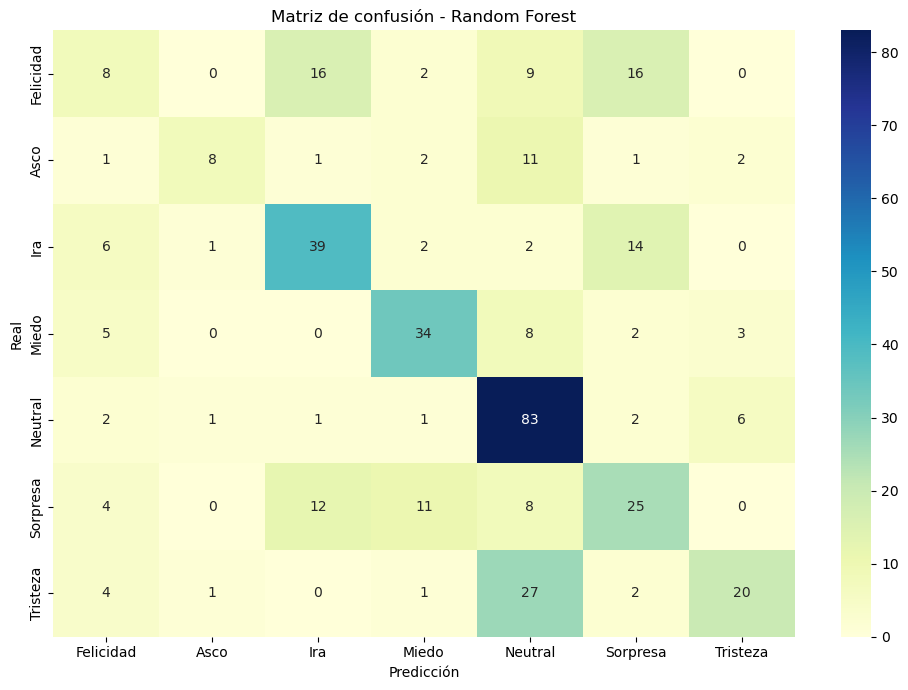

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Entrenar el modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_scaled, y_train)

# Predecir
y_pred = modelo_rf.predict(X_test_scaled)
#print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
#print(classification_report(y_test, y_pred, target_names=list(diccionario_emociones.values())))

# Ver las predicciones
print("Predicciones únicas en y_pred:")
print(np.unique(y_pred, return_counts=True))

# convirtiendo predicciones a nombres:
emociones_predichas = pd.Series(y_pred).map(diccionario_emociones)

# Ordenar según el orden definido en el diccionario
orden = list(diccionario_emociones.values())
conteo = emociones_predichas.value_counts()
conteo = conteo.reindex(orden)

print("\nDistribución de clases con nombres (orden según diccionario):")
print(conteo)

# Evaluación
print("\nEvaluación del modelo Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=list(diccionario_emociones.values())))

# Matriz de confusión
y_test_nombres = pd.Series(y_test).map(diccionario_emociones)
y_pred_nombres = pd.Series(y_pred).map(diccionario_emociones)
matriz = confusion_matrix(y_test_nombres, y_pred_nombres, labels=orden)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz, annot=True, fmt='d', cmap='YlGnBu', xticklabels=orden, yticklabels=orden)
plt.title('Matriz de confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


### Plan de mejora para el modelo
✅ 1. Explicabilidad con SHAP
- Descubriremos qué características están influenciando más las decisiones del modelo.

✅ 2. Probar otros modelos supervisados

- 🔁 Regresión logística (modelo simple y explicable)

- 🔁 MLP (red neuronal) con Keras para ver si mejora la precisión

✅ 3. Balancear el dataset con SMOTE
- Reforzamos las clases minoritarias para que el modelo no se incline hacia las más frecuentes.


### 1. SHAP (SHapley Additive exPlanations)
- Propósito: Explicabilidad del modelo, permite entender cómo cada característica afecta a la predicción.

- Aplicación: Se usó en combinación con un modelo RandomForestClassifier.

- Estructura del dataset:

MFCC (13 coef. × 4 estadísticas) = 52

ΔMFCC = 13

ΔΔMFCC = 13

Centroide espectral = 6

Planitud espectral = 6

Contraste espectral (7 subbandas × 4 estadísticas) = 28
→ Total parcial:118

Contraste espectral - Máx/Mín: 2

LPC: 17

Prosódicas: 3 (F₀, intensidad, tempo)
→ Total final: 140 características





Calculando valores SHAP...


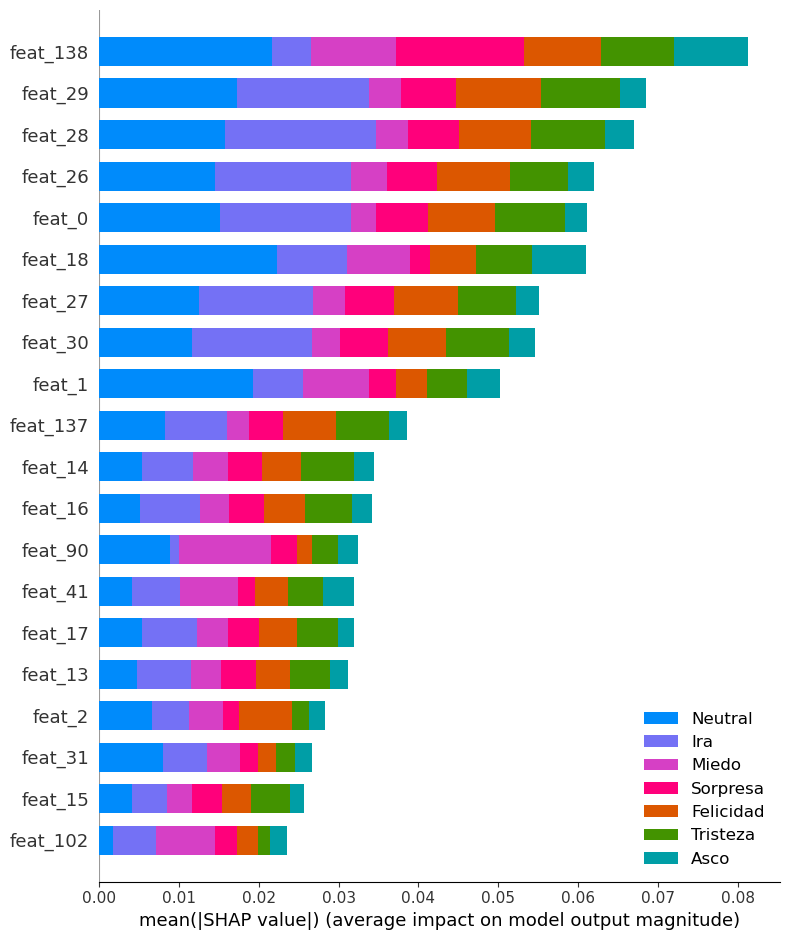

In [4]:
# ============================
# 1. EXPLICABILIDAD CON SHAP
# ============================
#!pip install shap
import shap

print("\nCalculando valores SHAP...")
explainer = shap.TreeExplainer(modelo_rf)
shap_values = explainer.shap_values(X_test_scaled)

# Gráfico de barras con la importancia media de cada característica
#  - Importancia media de cada feature en la predicción. Características que más influyen en la predicción del modelo 
#  - El color que aparece en cada barra indica para qué clase (emoción) esa feature fue más relevante, de media.
#  - Eje Y (vertical): Cada fila corresponde a una característica del modelo.
#  - Eje X (horizontal): Muestra la media del valor absoluto de SHAP para cada característica, es decir, 
#  - cuánto influye en promedio esa característica en la predicción del modelo, sin importar si sube o baja la predicción.

shap.summary_plot(
    shap_values,
    X_test_scaled,
    feature_names=[f'feat_{i}' for i in range(140)],    
    plot_type='bar',
    class_names=[diccionario_emociones[i] for i in range(7)]  # nombres de clase en orden
)

### ✅ 2.1 Regresión Logística (modelo simple y explicable)
📌 Ventajas:
- Muy rápida de entrenar.

- Fácil de interpretar.

- Buena línea base.


Evaluación del modelo Regresión Logística:
Accuracy: 0.62

Reporte de clasificación:
              precision    recall  f1-score   support

   Felicidad       0.46      0.33      0.39        51
        Asco       0.54      0.50      0.52        26
         Ira       0.69      0.80      0.74        64
       Miedo       0.61      0.65      0.63        52
     Neutral       0.71      0.71      0.71        96
    Sorpresa       0.58      0.55      0.56        60
    Tristeza       0.57      0.62      0.59        55

    accuracy                           0.62       404
   macro avg       0.59      0.59      0.59       404
weighted avg       0.61      0.62      0.61       404



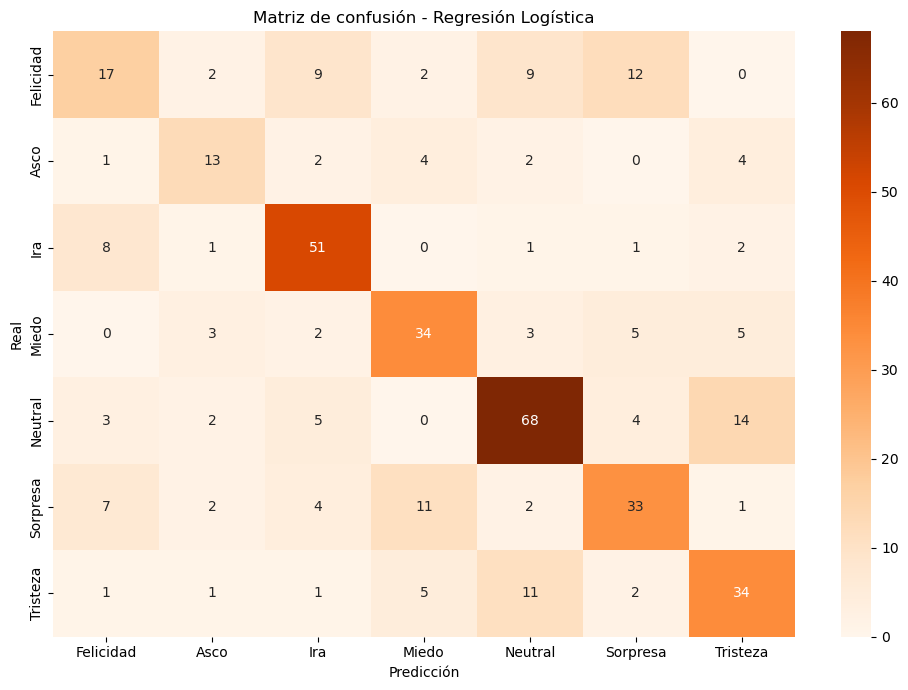

In [5]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo de Regresión Logística
modelo_logreg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
modelo_logreg.fit(X_train_scaled, y_train)

# Predicción
y_pred_logreg = modelo_logreg.predict(X_test_scaled)

# Evaluación
print("\nEvaluación del modelo Regresión Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_logreg, target_names=list(diccionario_emociones.values())))

# Matriz de confusión
y_pred_nombres_logreg = pd.Series(y_pred_logreg).map(diccionario_emociones)
matriz_logreg = confusion_matrix(y_test_nombres, y_pred_nombres_logreg, labels=orden)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_logreg, annot=True, fmt='d', cmap='Oranges', xticklabels=orden, yticklabels=orden)
plt.title('Matriz de confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


### ✅ 2.2 MLP – Red neuronal multicapa (con Keras)
📌 Configuración
- 1 capa oculta de 64 neuronas

- Activación ReLU + Softmax en salida

- Entrenamiento con Adam

- Función de pérdida: sparse_categorical_crossentropy (porque las etiquetas son enteros del 0 al 6)






Epoch 1/30


101/101 [==============================] - 4s 14ms/step - loss: 1.6842 - accuracy: 0.3428 - val_loss: 1.4817 - val_accuracy: 0.4455
Epoch 2/30
101/101 [==============================] - 1s 7ms/step - loss: 1.2871 - accuracy: 0.5105 - val_loss: 1.3190 - val_accuracy: 0.5074
Epoch 3/30
101/101 [==============================] - 0s 5ms/step - loss: 1.1110 - accuracy: 0.5786 - val_loss: 1.2421 - val_accuracy: 0.5322
Epoch 4/30
101/101 [==============================] - 0s 4ms/step - loss: 0.9832 - accuracy: 0.6380 - val_loss: 1.1909 - val_accuracy: 0.5421
Epoch 5/30
101/101 [==============================] - 1s 5ms/step - loss: 0.8808 - accuracy: 0.6801 - val_loss: 1.1823 - val_accuracy: 0.5495
Epoch 6/30
101/101 [==============================] - 1s 6ms/step - loss: 0.7904 - accuracy: 0.7178 - val_loss: 1.1584 - val_accuracy: 0.5446
Epoch 7/30
101/101 [==============================] - 1s 6ms/step - loss: 0.7026 - accuracy: 0.7568 - val_loss: 1.1541 - val_accuracy: 0.5718


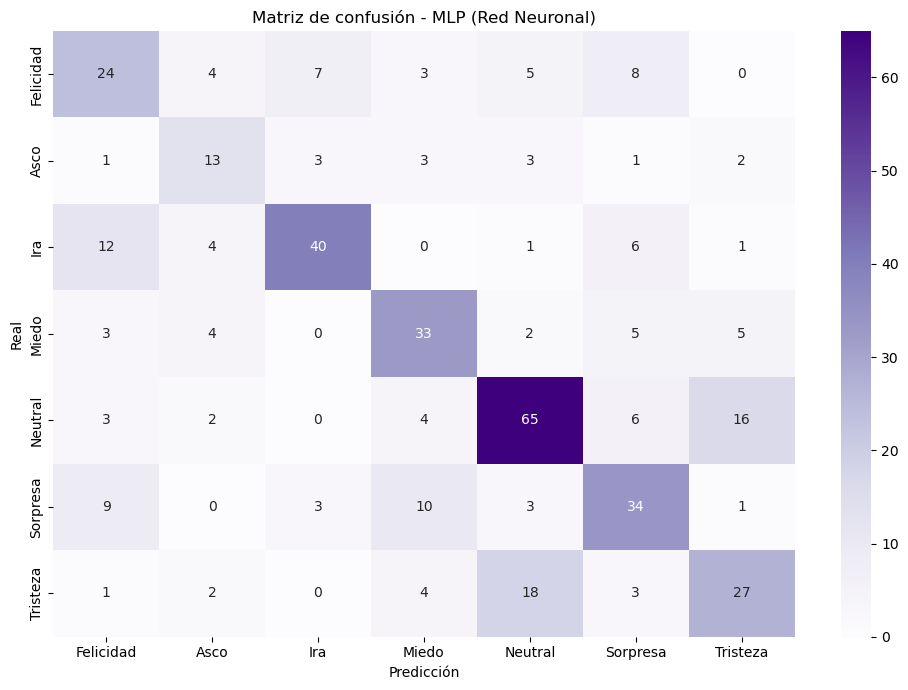

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Definir el modelo
modelo_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # 7 clases
])

modelo_mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # porque usamos enteros (no one-hot)
    metrics=['accuracy']
)

# Entrenar el modelo
history = modelo_mlp.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=30,
    batch_size=16,
    verbose=1
)

# Evaluación
loss, accuracy = modelo_mlp.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nEvaluación del modelo MLP:")
print(f"Accuracy: {accuracy:.2f}")

# Predicción
y_pred_mlp = np.argmax(modelo_mlp.predict(X_test_scaled), axis=1)

# Reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_mlp, target_names=list(diccionario_emociones.values())))

# Matriz de confusión
y_pred_nombres_mlp = pd.Series(y_pred_mlp).map(diccionario_emociones)
matriz_mlp = confusion_matrix(y_test_nombres, y_pred_nombres_mlp, labels=orden)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_mlp, annot=True, fmt='d', cmap='Purples', xticklabels=orden, yticklabels=orden)
plt.title('Matriz de confusión - MLP (Red Neuronal)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


### 3. Balancear con smote

In [7]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE solo al conjunto de entrenamiento (¡nunca al test!)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Verificamos la nueva distribución
from collections import Counter
conteo_smote = Counter(y_train_smote)
print("\nDistribución tras SMOTE (entrenamiento):")
for clase, cantidad in sorted(conteo_smote.items()):
    print(f"{diccionario_emociones[clase]}: {cantidad} muestras")



Distribución tras SMOTE (entrenamiento):
Felicidad: 385 muestras
Asco: 385 muestras
Ira: 385 muestras
Miedo: 385 muestras
Neutral: 385 muestras
Sorpresa: 385 muestras
Tristeza: 385 muestras


### RandomForest con Smote

Predicciones únicas en y_pred:
(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), array([ 44,  34,  68,  52, 110,  51,  45], dtype=int64))

Distribución de clases con nombres (orden según diccionario):
Felicidad     44
Asco          34
Ira           68
Miedo         52
Neutral      110
Sorpresa      51
Tristeza      45
Name: count, dtype: int64

Evaluación del modelo Random Forest:
Accuracy: 0.54

Reporte de clasificación:
              precision    recall  f1-score   support

   Felicidad       0.39      0.33      0.36        51
        Asco       0.38      0.50      0.43        26
         Ira       0.59      0.62      0.61        64
       Miedo       0.56      0.56      0.56        52
     Neutral       0.64      0.73      0.68        96
    Sorpresa       0.47      0.40      0.43        60
    Tristeza       0.56      0.45      0.50        55

    accuracy                           0.54       404
   macro avg       0.51      0.51      0.51       404
weighted avg       0.54      0.54     

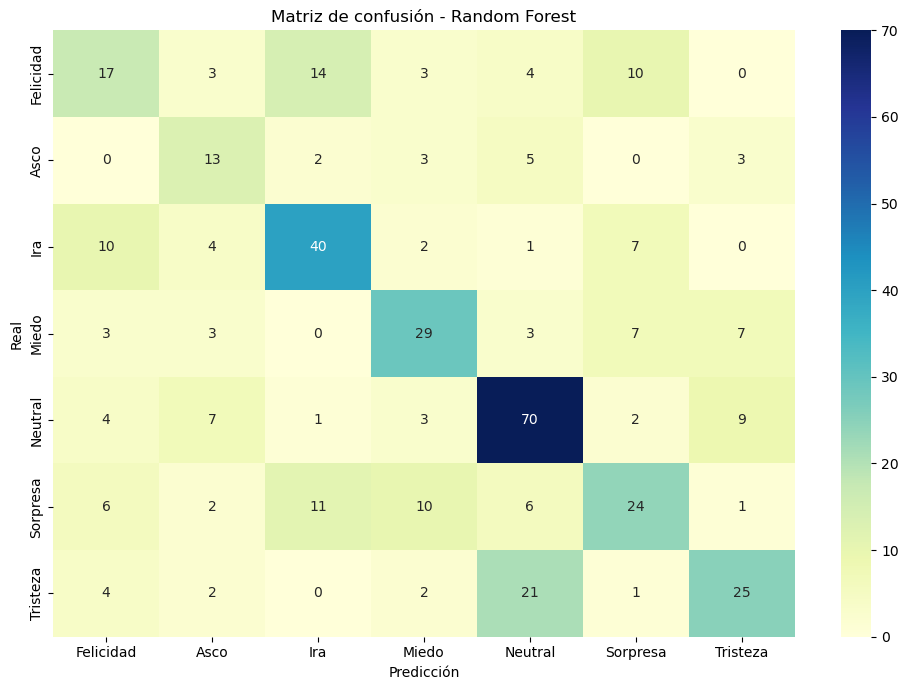

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Entrenar el modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_smote, y_train_smote)

# Predecir
y_pred = modelo_rf.predict(X_test_scaled)
#print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
#print(classification_report(y_test, y_pred, target_names=list(diccionario_emociones.values())))

# Ver las predicciones
print("Predicciones únicas en y_pred:")
print(np.unique(y_pred, return_counts=True))

# convirtiendo predicciones a nombres:
emociones_predichas = pd.Series(y_pred).map(diccionario_emociones)

# Ordenar según el orden definido en el diccionario
orden = list(diccionario_emociones.values())
conteo = emociones_predichas.value_counts()
conteo = conteo.reindex(orden)

print("\nDistribución de clases con nombres (orden según diccionario):")
print(conteo)

# Evaluación
print("\nEvaluación del modelo Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=list(diccionario_emociones.values())))

# Matriz de confusión
y_test_nombres = pd.Series(y_test).map(diccionario_emociones)
y_pred_nombres = pd.Series(y_pred).map(diccionario_emociones)
matriz = confusion_matrix(y_test_nombres, y_pred_nombres, labels=orden)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz, annot=True, fmt='d', cmap='YlGnBu', xticklabels=orden, yticklabels=orden)
plt.title('Matriz de confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


### Regresión con SMOTE


Evaluación del modelo Regresión Logística:
Accuracy: 0.62

Reporte de clasificación:
              precision    recall  f1-score   support

   Felicidad       0.53      0.35      0.42        51
        Asco       0.41      0.54      0.47        26
         Ira       0.70      0.75      0.72        64
       Miedo       0.62      0.65      0.64        52
     Neutral       0.80      0.67      0.73        96
    Sorpresa       0.55      0.53      0.54        60
    Tristeza       0.53      0.71      0.60        55

    accuracy                           0.62       404
   macro avg       0.59      0.60      0.59       404
weighted avg       0.63      0.62      0.62       404



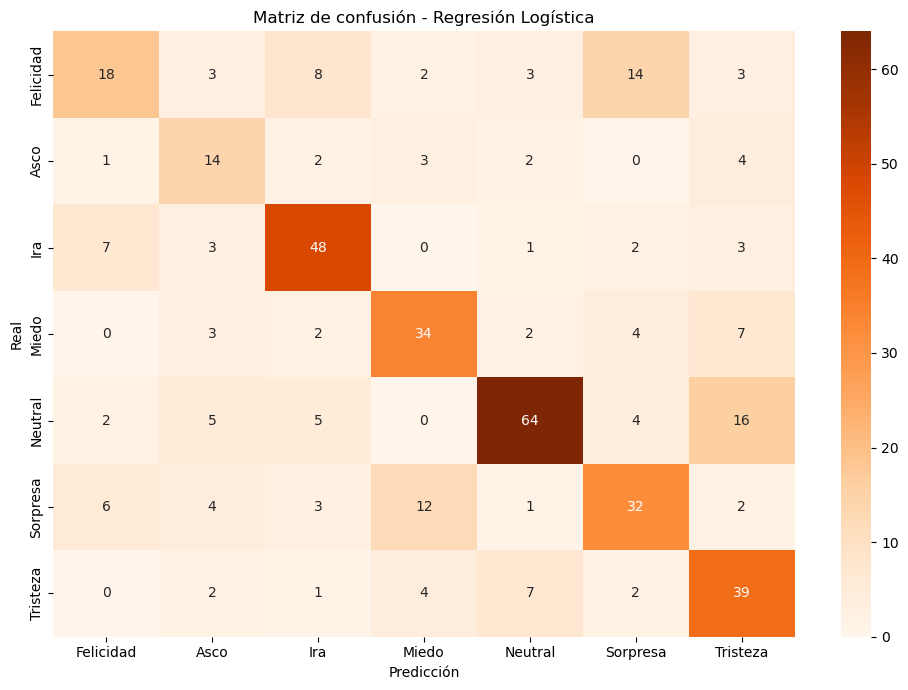

In [9]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo de Regresión Logística
modelo_logreg = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
modelo_logreg.fit(X_train_smote, y_train_smote)

# Predicción
y_pred_logreg = modelo_logreg.predict(X_test_scaled)

# Evaluación
print("\nEvaluación del modelo Regresión Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_logreg, target_names=list(diccionario_emociones.values())))

# Matriz de confusión
y_pred_nombres_logreg = pd.Series(y_pred_logreg).map(diccionario_emociones)
matriz_logreg = confusion_matrix(y_test_nombres, y_pred_nombres_logreg, labels=orden)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_logreg, annot=True, fmt='d', cmap='Oranges', xticklabels=orden, yticklabels=orden)
plt.title('Matriz de confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


### MLP con SMOTE

Epoch 1/30
169/169 [==============================] - 3s 9ms/step - loss: 1.5414 - accuracy: 0.3892 - val_loss: 1.3535 - val_accuracy: 0.4703
Epoch 2/30
169/169 [==============================] - 1s 6ms/step - loss: 1.0558 - accuracy: 0.6297 - val_loss: 1.2759 - val_accuracy: 0.5124
Epoch 3/30
169/169 [==============================] - 1s 4ms/step - loss: 0.8140 - accuracy: 0.7299 - val_loss: 1.1757 - val_accuracy: 0.5668
Epoch 4/30
169/169 [==============================] - 1s 5ms/step - loss: 0.6451 - accuracy: 0.7926 - val_loss: 1.1975 - val_accuracy: 0.5767
Epoch 5/30
169/169 [==============================] - 1s 7ms/step - loss: 0.5265 - accuracy: 0.8334 - val_loss: 1.2203 - val_accuracy: 0.5817
Epoch 6/30
169/169 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8753 - val_loss: 1.2301 - val_accuracy: 0.5718
Epoch 7/30
169/169 [==============================] - 1s 5ms/step - loss: 0.3478 - accuracy: 0.8965 - val_loss: 1.2588 - val_accuracy: 0.5916
Epoch 

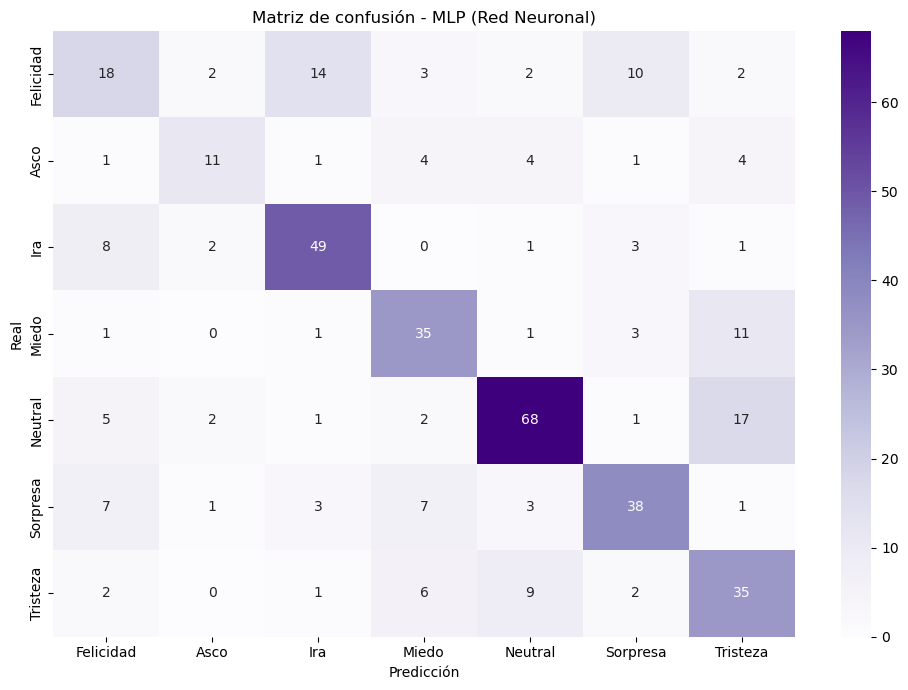

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Definir el modelo
modelo_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # 7 clases
])

modelo_mlp.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # porque usamos enteros (no one-hot)
    metrics=['accuracy']
)

# Entrenar el modelo
history = modelo_mlp.fit(
    X_train_smote, y_train_smote,
    validation_data=(X_test_scaled, y_test),
    epochs=30,
    batch_size=16,
    verbose=1
)

# Evaluación
loss, accuracy = modelo_mlp.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nEvaluación del modelo MLP:")
print(f"Accuracy: {accuracy:.2f}")

# Predicción
y_pred_mlp = np.argmax(modelo_mlp.predict(X_test_scaled), axis=1)

# Reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_mlp, target_names=list(diccionario_emociones.values())))

# Matriz de confusión
y_pred_nombres_mlp = pd.Series(y_pred_mlp).map(diccionario_emociones)
matriz_mlp = confusion_matrix(y_test_nombres, y_pred_nombres_mlp, labels=orden)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_mlp, annot=True, fmt='d', cmap='Purples', xticklabels=orden, yticklabels=orden)
plt.title('Matriz de confusión - MLP (Red Neuronal)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


## FASE 4 – Extraer características y predecir

In [14]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(modelo_rf, 'modelo_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Guardar el scaler 


['scaler.pkl']

In [11]:
import librosa
import numpy as np
import scipy.stats

def extraer_caracteristicas_voz(ruta_audio):
    y, sr = librosa.load(ruta_audio, sr=None)

    # Normalizar amplitud del audio para evitar saturación
    if np.max(np.abs(y)) > 0:
        y = y / np.max(np.abs(y))

    features = []

    # 1. MFCCs (13 × 4 estadísticas = 52)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for stat_func in [np.mean, np.std, scipy.stats.skew, scipy.stats.kurtosis]:
        features.extend(stat_func(mfcc, axis=1))

    # 2. Delta y delta-delta MFCCs (13 × 2 = 26)
    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    features.extend(np.mean(delta_mfcc, axis=1))
    features.extend(np.mean(delta2_mfcc, axis=1))

    # 3. Centroide espectral (6)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    for stat_func in [np.mean, np.std, np.min, np.max, scipy.stats.skew, scipy.stats.kurtosis]:
        features.extend(stat_func(centroid, axis=1))

    # 4. Planitud espectral (6)
    flatness = librosa.feature.spectral_flatness(y=y)
    for stat_func in [np.mean, np.std, np.min, np.max, scipy.stats.skew, scipy.stats.kurtosis]:
        features.extend(stat_func(flatness, axis=1))

    # 5. Contraste espectral (7 subbandas × 4 estadísticas = 28)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    for stat_func in [np.mean, np.std, np.min, np.max]:
        features.extend(stat_func(contrast, axis=1))

    # 6. Máximo y mínimo global del contraste (2)
    features.append(np.max(contrast).item())
    features.append(np.min(contrast).item())

    # 7. LPC (17 coeficientes)
    try:
        lpc = librosa.lpc(y, order=17)
        features.extend(lpc[:17])
    except Exception as e:
        print("⚠️ Error calculando LPC:", e)
        features.extend([0.0] * 17)

    # 8. Prosódicas: F0, RMS, Tempo (3)
    try:
        f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
        f0_mean = np.nanmean(f0) if np.any(~np.isnan(f0)) else 0
    except Exception as e:
        print("⚠️ Error en F0:", e)
        f0_mean = 0
    features.append(f0_mean)

    try:
        rms = librosa.feature.rms(y=y)
        features.append(np.mean(rms).item())
    except Exception as e:
        print("⚠️ Error en RMS:", e)
        features.append(0.0)

    try:
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        features.append(tempo)
    except Exception as e:
        print("⚠️ Error en tempo:", e)
        features.append(0.0)

    # Seguridad: convertir a float y limitar valores extremos
    features = [float(np.array(f).item()) for f in features]
    features = np.clip(features, -1000, 1000)

    # Imprimir los valores de las características extraídas para el nuevo audio
    #print("Características extraídas para el audio:", ruta_audio)
    #for idx, value in enumerate(features):
    #    print(f"Característica {nombre_caracteristica(idx)}: {value:.3f}")
    
    return np.array(features).reshape(1, -1)


In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Prueba con Características reales
caracteristicas_originales = np.array([
    -419.060516, 72.9367371, 15.4607449, 8.22659588, 15.3578157, 20.0592995,
    -7.1701045, -0.0877799466, -2.98935103, 3.97267723, 0.36433205, -1.82771039,
    -2.65550566, 150.297272, 78.0785675, 27.8999004, 20.5126114, 18.2876644,
    19.4916153, 21.6050663, 11.062911, 11.1300392, 9.92586994, 9.82888222,
    11.3760548, 9.21645737, 0.498189598, 0.75077647, 0.792757332, -0.0198627468,
    1.87820792, 1.0366528, -1.09850681, -1.1746006, -1.13204205, 0.249472469,
    -0.213161826, -0.69531852, -0.704758406, -1.34320569, -1.03844082, 1.76733303,
    2.78697157, 4.39239454, -0.264937639, 0.140345573, 1.52099371, 0.811050653,
    2.04787731, 1.97531319, 1.19324493, 0.366494656, -0.010911312, 0.0381878801,
    0.0651888177, 0.0188234951, 0.0321145728, 0.0106033459, 0.0103400899,
    0.0163642559, 0.00762449764, 0.00183589407, 0.00645006076, 0.00574984867,
    -0.00386448461, -0.00619911682, 0.000664469262, -0.00784092396,
    -0.00647589425, -0.00185593672, 0.00158052775, -0.00268665142, -0.00407985039,
    0.00719837798, -0.00204293197, -0.00453082053, -0.0033134853, 0.00383954565,
    1000.0, 1000.0, 0.0, 1000.0, -0.255893315, -1.38238853, 0.0525062121,
    0.164107367, 9.67289634e-06, 1.00000072, 5.37145185, 28.0363998, 13.9820095,
    9.76069913, 12.6110065, 14.7387492, 16.8733101, 17.4068506, 51.8897633,
    5.67915559, 3.58366312, 3.96189116, 3.88297082, 4.22418671, 4.91364717,
    7.83496617, 2.59470483, 1.06849001, 2.96111392, 5.38831551, 8.452616,
    9.67730061, 11.7241628, 35.1391695, 26.1141556, 26.2046135, 28.7394247,
    31.4266659, 36.1644512, 60.9038302, 60.9038302, 1.06849001, 1.0, -2.18832636,
    2.73957276, -3.26838923, 3.78039503, -4.39441347, 4.9924283, -5.41235638,
    5.44901609, -5.18474197, 4.72573805, -4.16589928, 3.53286266, -2.76128125,
    2.09061885, -1.45311081, 0.770395398, 82.1551144, 0.0433936231, 83.9552239
])

# Escalador
scaler = StandardScaler()
caracteristicas_escaladas = scaler.fit_transform(caracteristicas_originales.reshape(1, -1)).flatten()

# Mostrar los valores que parecen "explotar"
for i, (orig, esc) in enumerate(zip(caracteristicas_originales, caracteristicas_escaladas)):
    if abs(esc) > 10:
        print(f"🔴 Posición {i}: original={orig:.2f}, escalado={esc:.2f}")


🎧 Archivo: asco.wav → Emoción detectada: Asco


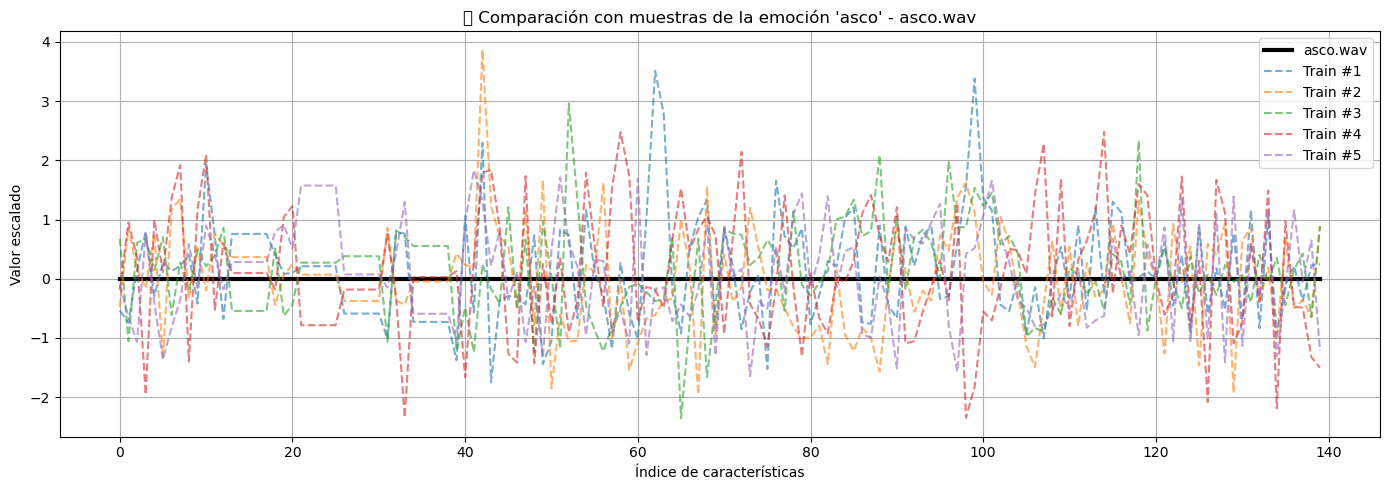

🎧 Archivo: asco2.wav → Emoción detectada: Neutral


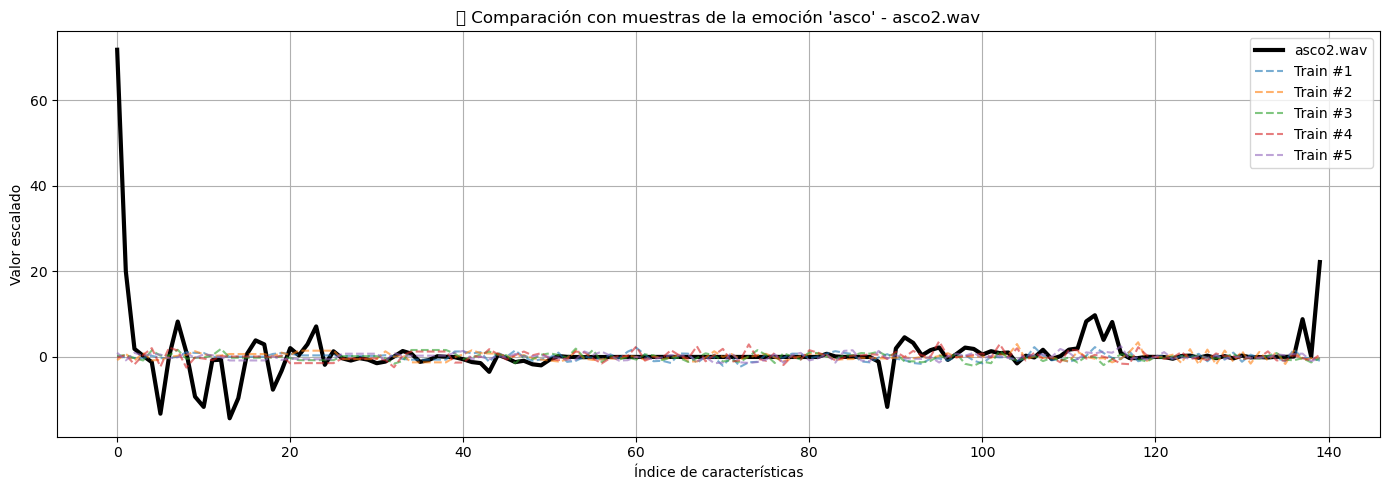

🎧 Archivo: felicidad.wav → Emoción detectada: Tristeza


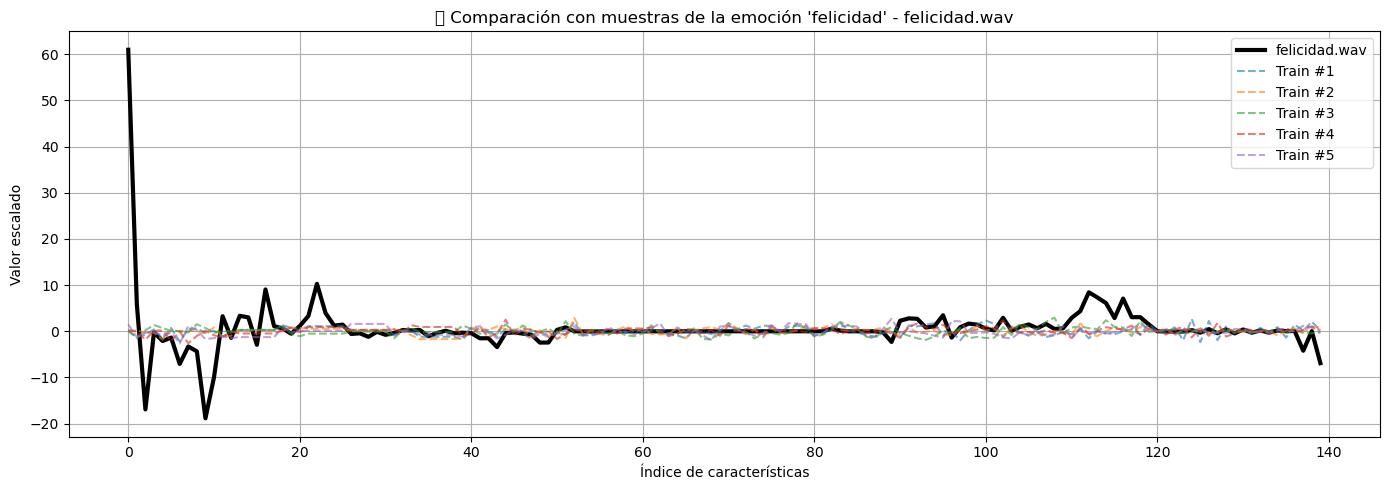

🎧 Archivo: Felicidad2.wav → Emoción detectada: Tristeza


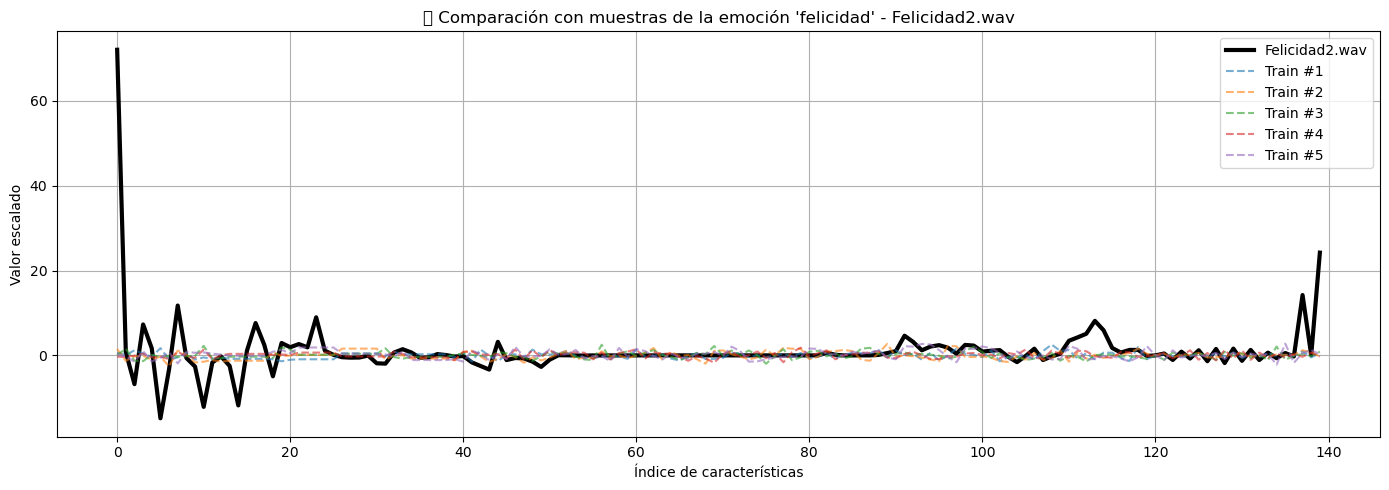

🎧 Archivo: ira.wav → Emoción detectada: Neutral


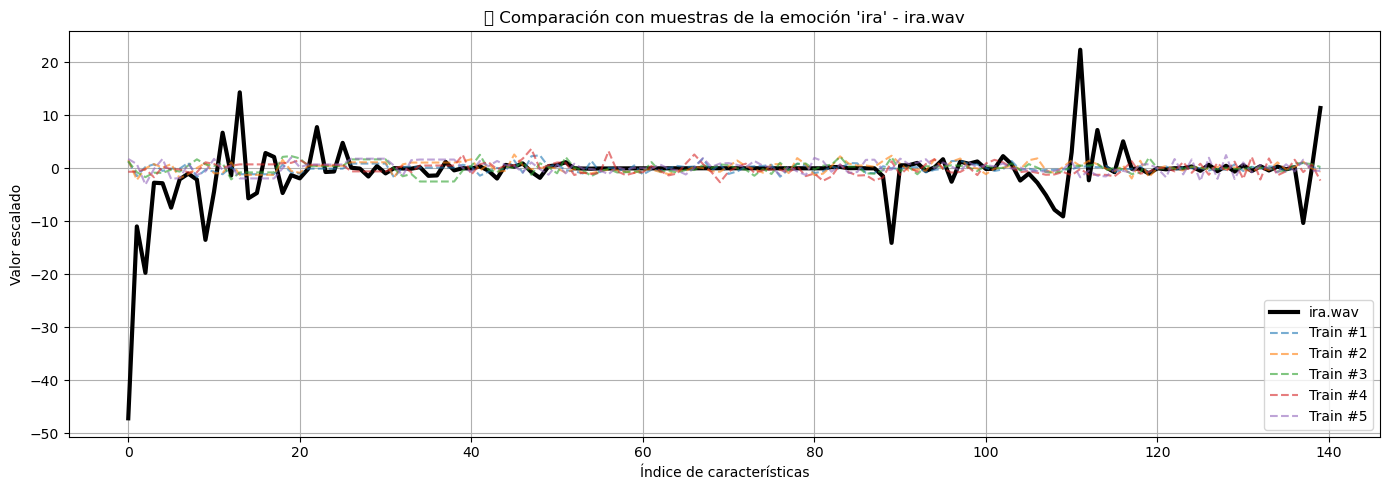

🎧 Archivo: ira2.wav → Emoción detectada: Neutral


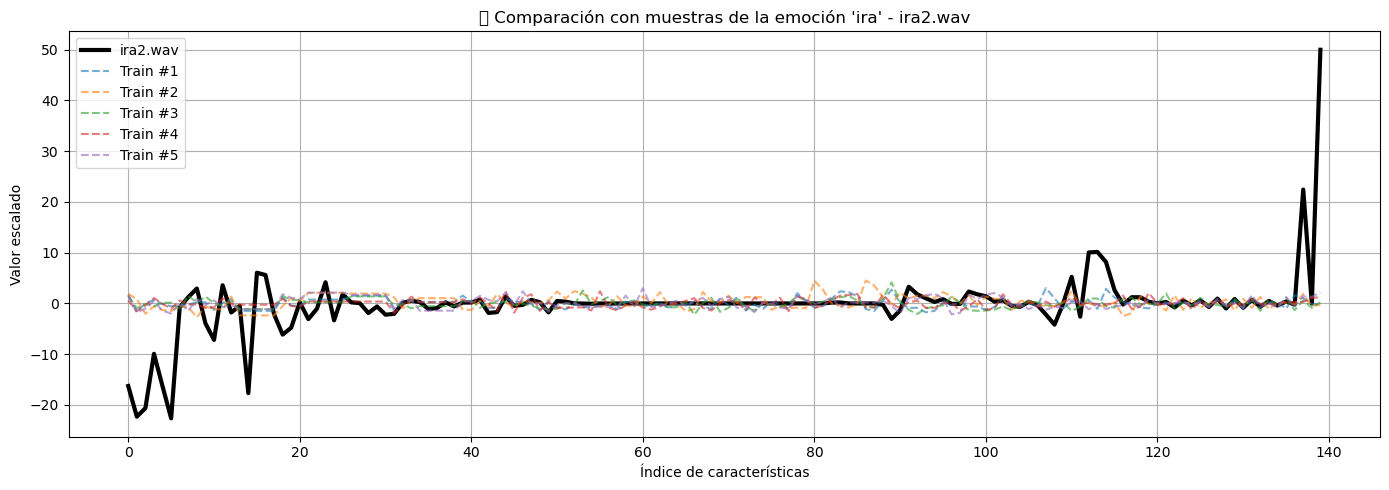

🎧 Archivo: miedo.wav → Emoción detectada: Neutral


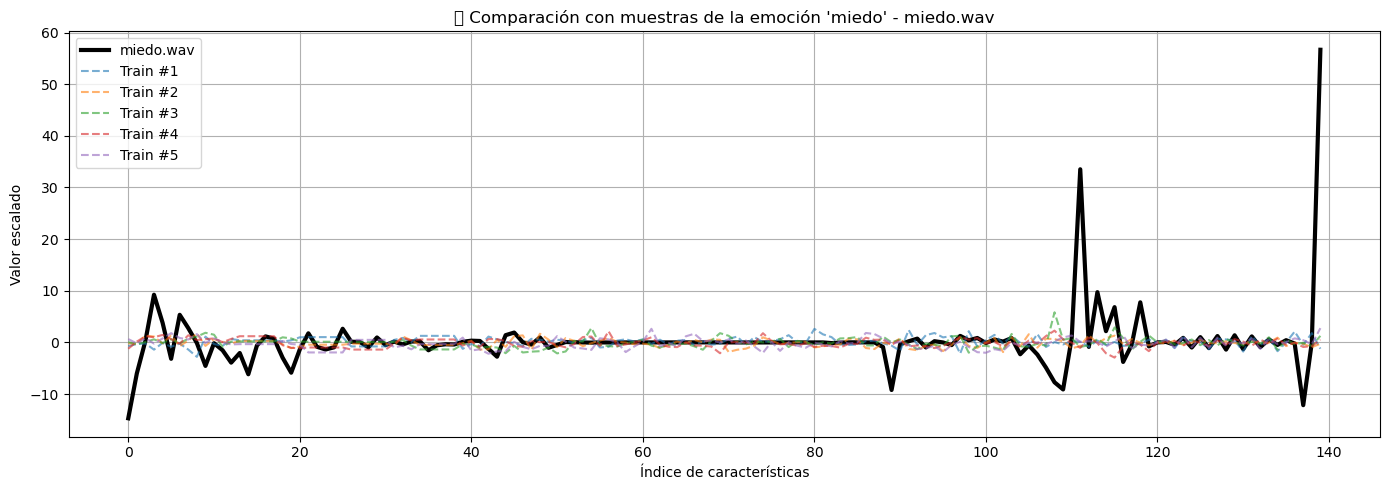

🎧 Archivo: Miedo2.wav → Emoción detectada: Neutral


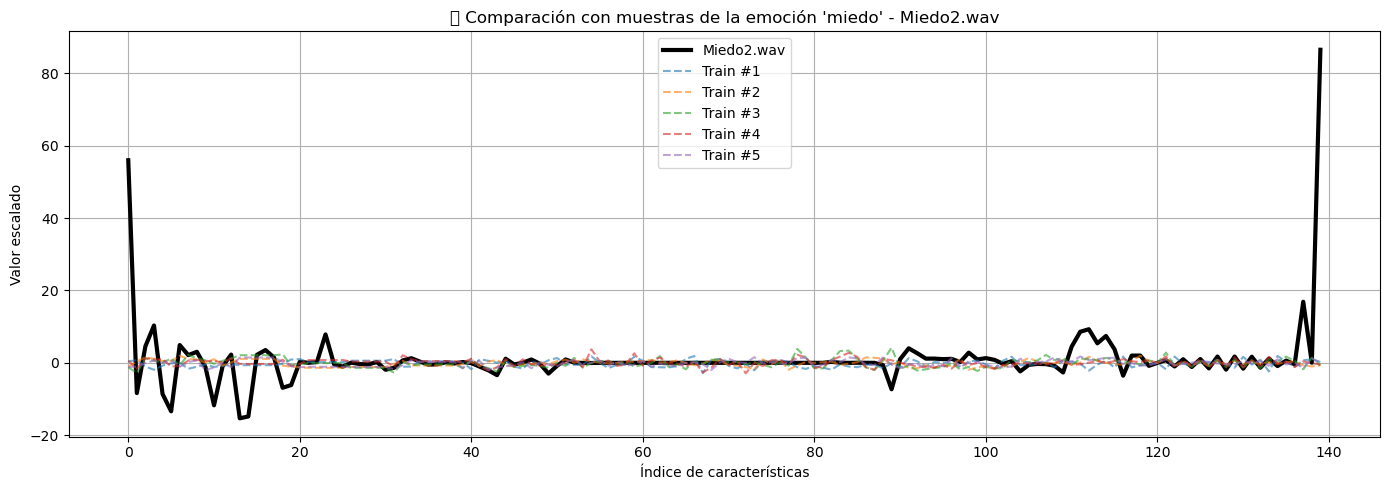

🎧 Archivo: Neutral.wav → Emoción detectada: Neutral


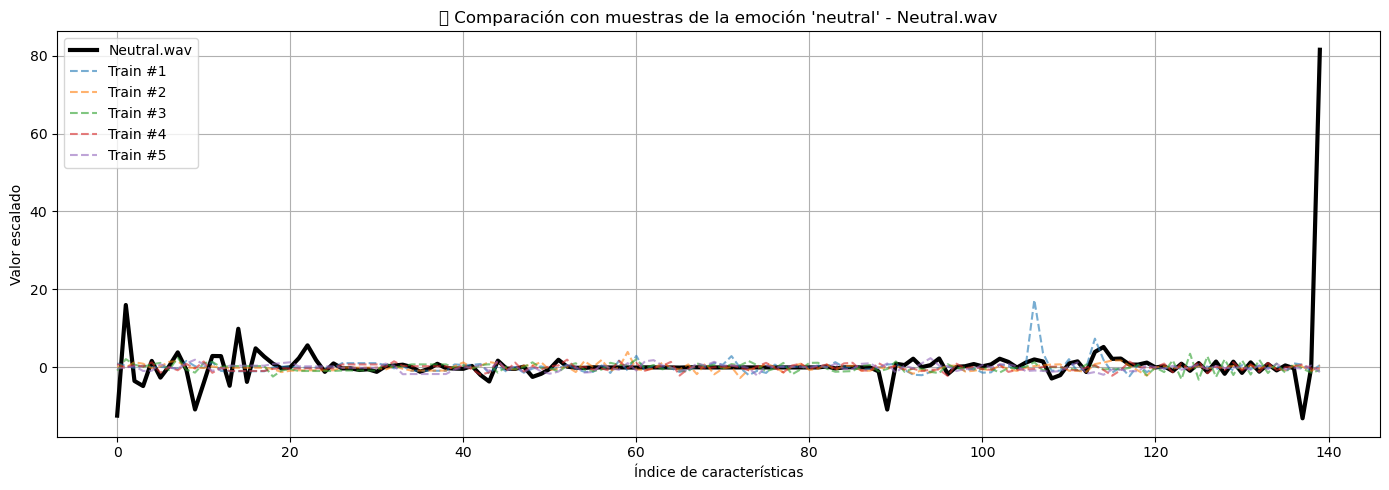

🎧 Archivo: Neutral2.wav → Emoción detectada: Neutral


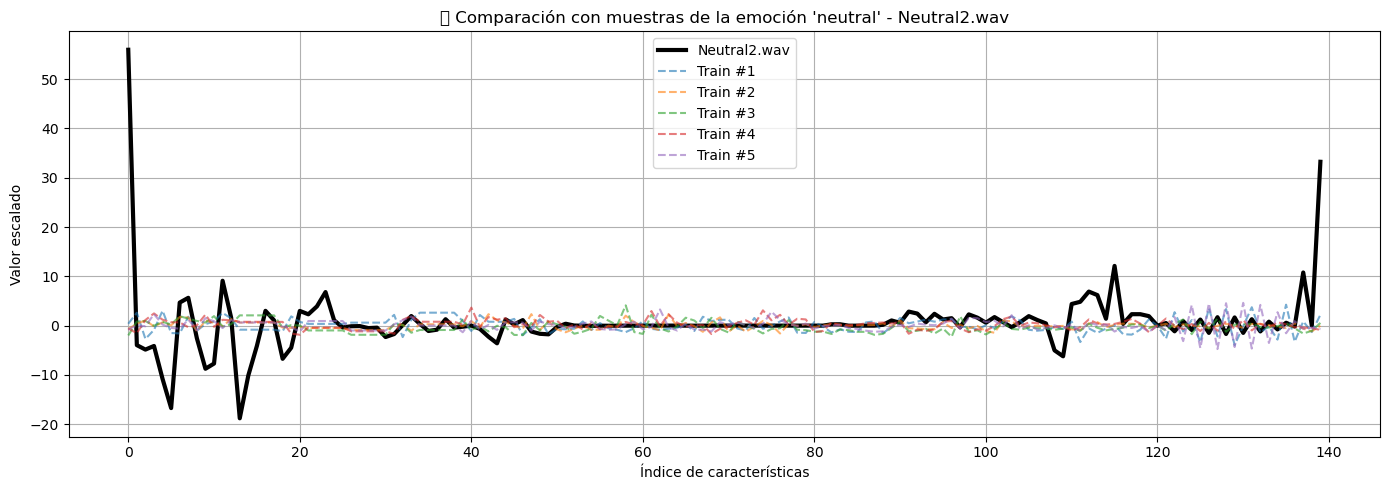

🎧 Archivo: Sorpresa.wav → Emoción detectada: Neutral


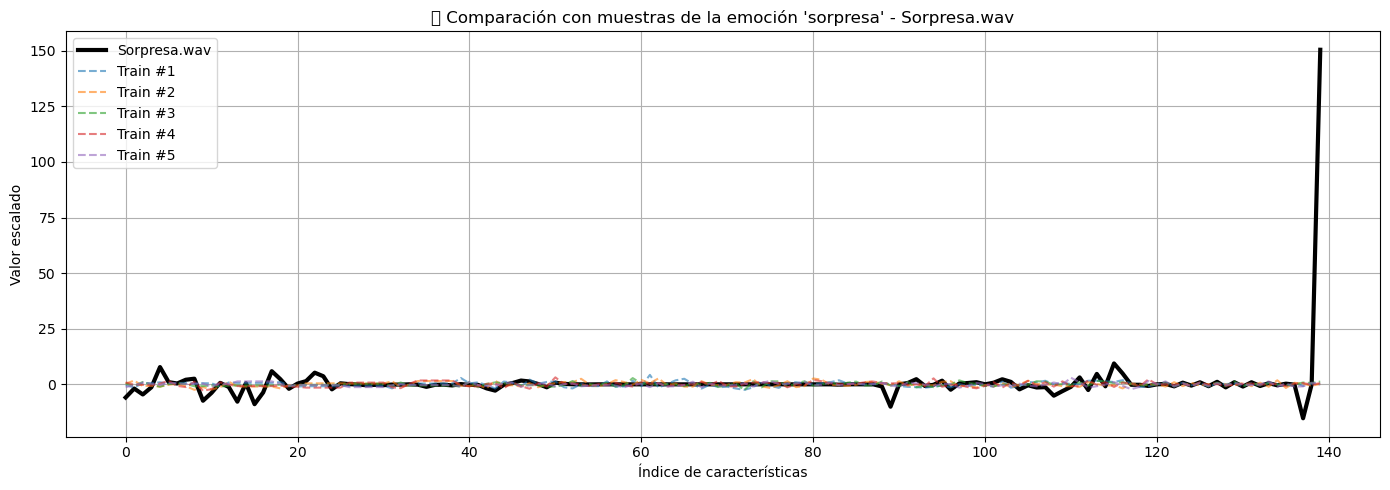

🎧 Archivo: Sorpresa2.wav → Emoción detectada: Tristeza


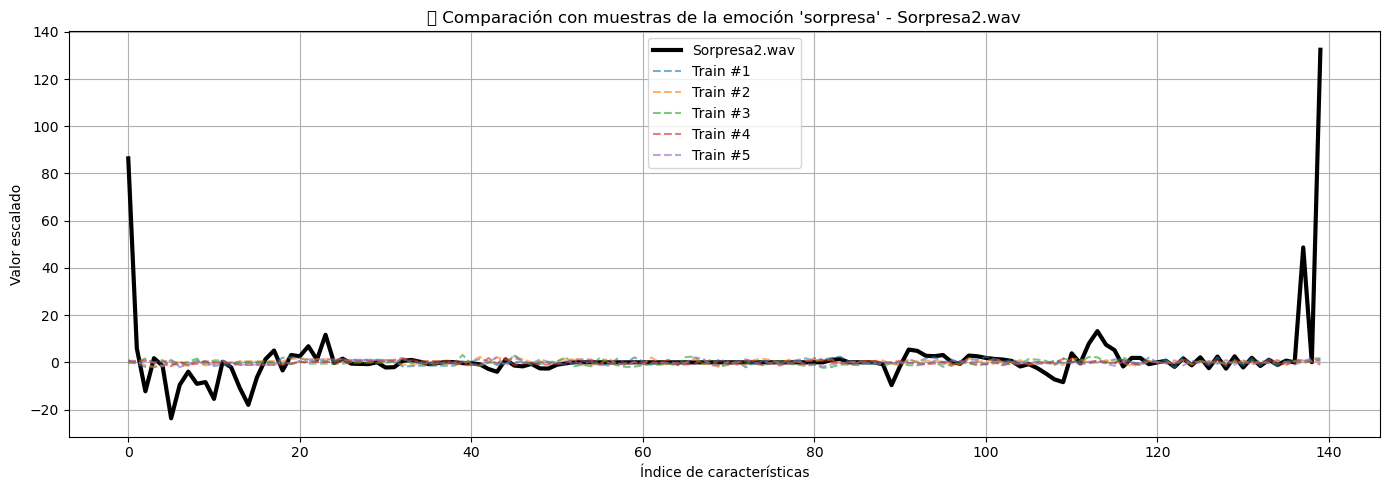

🎧 Archivo: tristeza.wav → Emoción detectada: Neutral


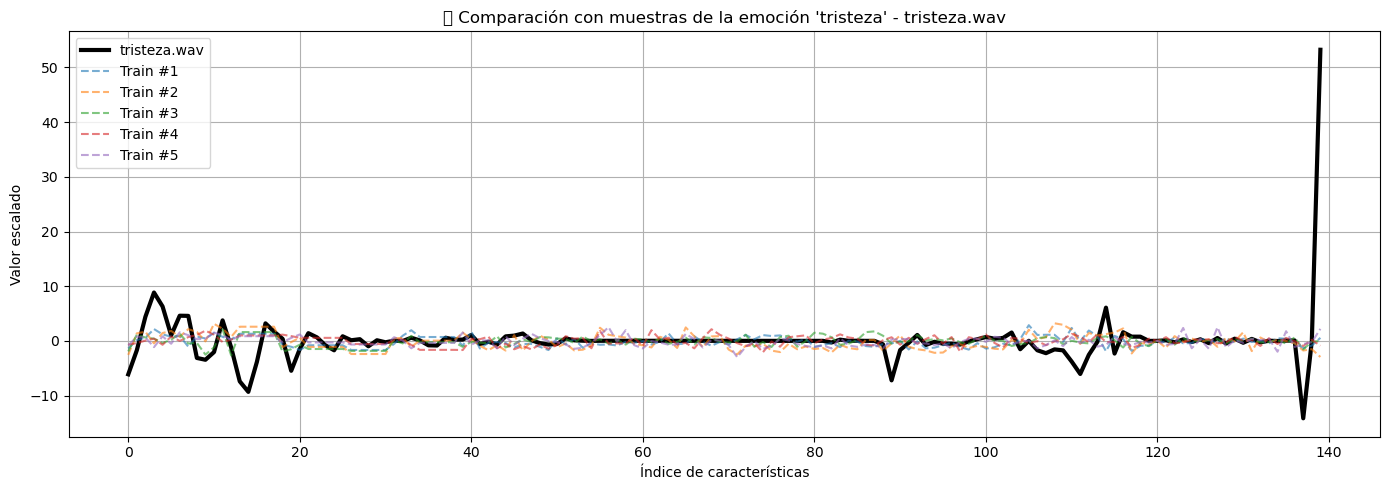

🎧 Archivo: tristeza2.wav → Emoción detectada: Neutral


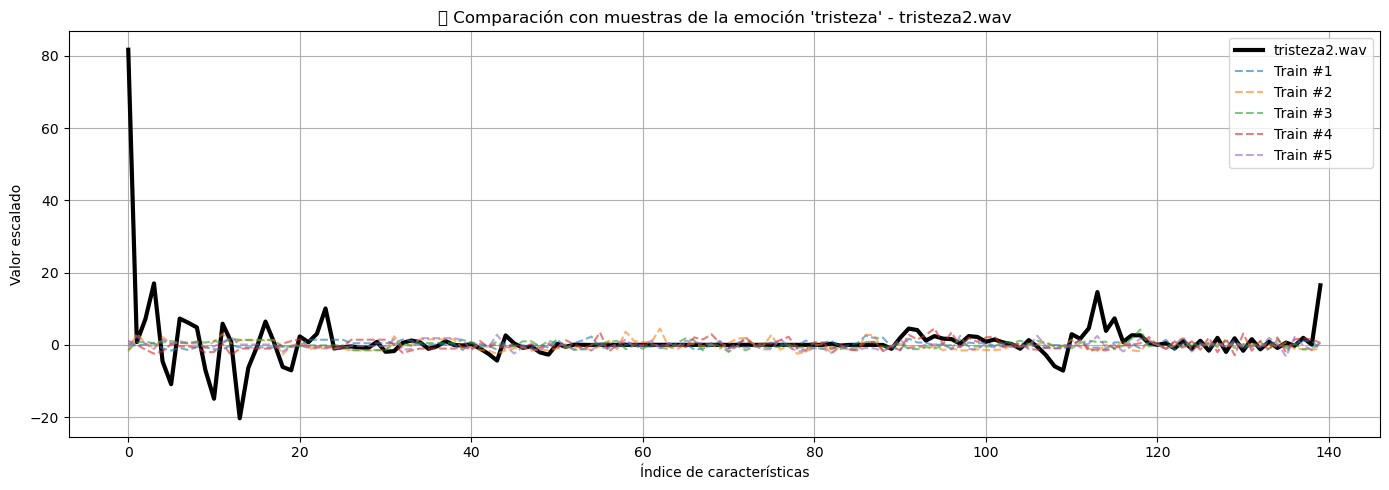

🎧 Archivo: voz_prueba.mp3 → Emoción detectada: Neutral
⚠️ No se pudo encontrar etiqueta para emoción 'voz_prueba.mp'
🎧 Archivo: voz_prueba2.mp3 → Emoción detectada: Neutral
⚠️ No se pudo encontrar etiqueta para emoción 'voz_prueba.mp'


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

carpeta = "audios_test"

for archivo in os.listdir(carpeta):
    if archivo.endswith(".wav") or archivo.endswith(".mp3"):
        ruta = os.path.join(carpeta, archivo)

        # Extraer características
        muestra = extraer_caracteristicas_voz(ruta)

        # Validar dimensiones
        if muestra.shape[1] != scaler.n_features_in_:
            print(f"❌ {archivo} tiene {muestra.shape[1]} características, se esperaban {scaler.n_features_in_}")
            continue

        # Escalar 
        muestra_scaled = scaler.transform(muestra)
        
        # Predecir
        pred = modelo_rf.predict(muestra_scaled)
        emocion_predicha = diccionario_emociones[int(pred[0])]
        print(f"🎧 Archivo: {archivo} → Emoción detectada: {emocion_predicha}")

        # ➕ Extraer emoción del nombre del archivo (ej: 'asco2.wav' → 'asco')
        emocion_nombre = ''.join([c for c in archivo if not c.isdigit()]).replace('.wav','').replace('.mp3','').lower()

        # Buscar etiqueta numérica correspondiente
        emocion_id = None
        for k, v in diccionario_emociones.items():
            if v.lower() == emocion_nombre:
                emocion_id = k
                break

        if emocion_id is None:
            print(f"⚠️ No se pudo encontrar etiqueta para emoción '{emocion_nombre}'")
            continue

        # Filtrar muestras del entrenamiento con la misma emoción
        indices_emocion = np.where(y_train == emocion_id)[0]

        if len(indices_emocion) < 5:
            print(f"⚠️ Solo hay {len(indices_emocion)} muestras de la emoción '{emocion_nombre}' en el entrenamiento.")
            continue

        idx_random = np.random.choice(indices_emocion, size=5, replace=False)
        muestras_referencia = X_train_scaled[idx_random]

        # Plot
        plt.figure(figsize=(14, 5))
        plt.plot(muestra_scaled[0], label=f'{archivo}', linewidth=3, color='black')
        for i, ref in enumerate(muestras_referencia):
            plt.plot(ref, label=f'Train #{i+1}', linestyle='--', alpha=0.6)
        plt.title(f"🔍 Comparación con muestras de la emoción '{emocion_nombre}' - {archivo}")
        plt.xlabel("Índice de características")
        plt.ylabel("Valor escalado")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
